# Assignment 7
Name: Suresh

Roll Number: EE24S014

## Part A
### 1 & 2: Load and Prepare Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

# Preprocessing
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split

# Models
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Metrics
from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve,
    average_precision_score,
    classification_report
)

# Set plot style
sns.set(style='whitegrid', context='talk')
%matplotlib inline

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

columns = [f'feature_{i}' for i in range(1, 37)] + ['class']

# Load training data
df_train = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn',
    sep=' ', header=None, names=columns
)

# Load test data
df_test = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst',
    sep=' ', header=None, names=columns
)

print(f"Original training shape: {df_train.shape}")
print(f"Original test shape: {df_test.shape}")

# Filter out class 6
df_train = df_train[df_train['class'] != 6].copy()
df_test = df_test[df_test['class'] != 6].copy()

# Remap classes {1, 2, 3, 4, 5, 7} -> {0, 1, 2, 3, 4, 5}
class_map = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 7: 5}
df_train['class'] = df_train['class'].map(class_map)
df_test['class'] = df_test['class'].map(class_map)

print(f"Filtered training shape: {df_train.shape}")
print(f"Filtered test shape: {df_test.shape}")

X_train = df_train.drop('class', axis=1)
y_train = df_train['class']

X_test = df_test.drop('class', axis=1)
y_test = df_test['class']

print(f"\nX_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Original training shape: (4435, 37)
Original test shape: (2000, 37)
Filtered training shape: (4435, 37)
Filtered test shape: (2000, 37)

X_train shape: (4435, 36), y_train shape: (4435,)
X_test shape: (2000, 36), y_test shape: (2000,)


In [10]:
df_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,2
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,2
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,2
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,2
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,56,64,108,96,64,71,108,96,68,75,...,92,66,83,108,96,66,87,104,89,4
4431,64,71,108,96,68,75,108,96,71,87,...,96,66,87,104,89,63,87,104,89,4
4432,68,75,108,96,71,87,108,88,71,91,...,89,63,87,104,89,70,100,104,85,3
4433,71,87,108,88,71,91,100,81,76,95,...,89,70,100,104,85,70,91,104,85,3


### 3. Train All Models:

In [11]:

# Define our 6 models
models = {
    "Dummy (Prior)": DummyClassifier(strategy='prior'),

    "Gaussian Naive Bayes": GaussianNB(),

    "Logistic Regression": LogisticRegression(
    solver='liblinear', random_state=42
    ),

    "Support Vector (SVC)": SVC(
        probability=True, random_state=42
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=100, random_state=42, n_jobs=-1
    ),

    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100, random_state=42
    )
}

# Dictionary to store fitted models
fitted_models = {}

print("--- Starting Model Training ---")
for name, model in models.items():
    start_time = time()
    print(f"Training {name}...", end=' ')

    # Train the model on scaled training data
    model.fit(X_train_scaled, y_train)

    # Store the fitted model
    fitted_models[name] = model

    train_time = time() - start_time
    print(f" done in {train_time:.3f}s")

--- Starting Model Training ---
Training Dummy (Prior)...  done in 0.004s
Training Gaussian Naive Bayes...  done in 0.004s
Training Logistic Regression...  done in 0.185s
Training Support Vector (SVC)...  done in 1.125s
Training Random Forest...  done in 0.989s
Training Gradient Boosting...  done in 13.813s


### 4. Baseline Evaluation:

In [12]:

# Store results
results = []

print("--- Starting Model Evaluation ---")
for name, model in fitted_models.items():
    # Get predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the results
    results.append({
        "Model": name,
        "Overall Accuracy": accuracy,
        "Weighted F1-Score": weighted_f1
    })

    print(f"Evaluated {name}")

results_df = pd.DataFrame(results).sort_values(by="Weighted F1-Score", ascending=False)
results_df.set_index("Model", inplace=True)

print("\n--- Baseline Model Performance ---")
print(results_df.to_markdown(floatfmt=".4f"))

--- Starting Model Evaluation ---
Evaluated Dummy (Prior)
Evaluated Gaussian Naive Bayes
Evaluated Logistic Regression
Evaluated Support Vector (SVC)
Evaluated Random Forest
Evaluated Gradient Boosting

--- Baseline Model Performance ---
| Model                |   Overall Accuracy |   Weighted F1-Score |
|:---------------------|-------------------:|--------------------:|
| Random Forest        |             0.9110 |              0.9089 |
| Support Vector (SVC) |             0.8955 |              0.8925 |
| Gradient Boosting    |             0.8920 |              0.8905 |
| Gaussian Naive Bayes |             0.7965 |              0.8036 |
| Logistic Regression  |             0.8180 |              0.7894 |
| Dummy (Prior)        |             0.2305 |              0.0864 |


Based on the baseline performance metrics, the models fall into three distinct groups:

* Worst Performer: The Dummy Classifier (Prior) performs abysmally, as expected. Its "prior" strategy predicts the most common class for every sample, resulting in an accuracy of 0.2305 (or ~23%, the prevalence of that class) and a near-zero F1-score of 0.0864. This serves as our "worse than random" baseline.

* Poor Performers: Gaussian Naive Bayes (Weighted F1: 0.8036) and Logistic Regression (Weighted F1: 0.7894) are in the next tier. Their scores are significantly lower than the top models. This suggests that the strong (and likely false) independence assumption of GNB and the linear boundaries of Logistic Regression are not sophisticated enough to capture the complex, high-dimensional relationships in the satellite data.

* Top Performers: The ensemble methods (Random Forest) and Support Vector (SVC) are the clear winners. Random Forest is the top model with an F1-Score of 0.9089. SVC (0.8925) and Gradient Boosting (0.8905) also perform very strongly, achieving scores just under the 90% mark.

## Part B: ROC Analysis for Model Selection


### 1. Multi-Class ROC Calculation (One-vs-Rest)

To adapt the binary ROC curve (TPR vs. FPR) for a multi-class problem, we use the One-vs-Rest (OvR) strategy.

1. Decompose: The N-class problem is split into N separate binary classification
problems (i.e., "Class 0 vs. Rest," "Class 1 vs. Rest," etc.).

2. Calculate Individual Curves: An ROC curve is generated for each of the N binary problems using the model's predicted probability for that specific class. This gives us N separate curves and N AUC scores.

3. Macro-Average: To get a single, summary curve, we "macro-average" the N curves. This involves interpolating all curves onto a common False Positive Rate (FPR) axis and then averaging their True Positive Rate (TPR) values at each point.

4. Final Metric: The Macro-Averaged AUC is the area under this new, averaged curve. This method treats all classes as equally important.

### 2. Plotting ROC

Calculating Macro-Averaged ROC curves for all models...
  Dummy (Prior): Macro-AUC = 0.5000
  Gaussian Naive Bayes: Macro-AUC = 0.9553
  Logistic Regression: Macro-AUC = 0.9535
  Support Vector (SVC): Macro-AUC = 0.9852
  Random Forest: Macro-AUC = 0.9900
  Gradient Boosting: Macro-AUC = 0.9868
Calculations complete.


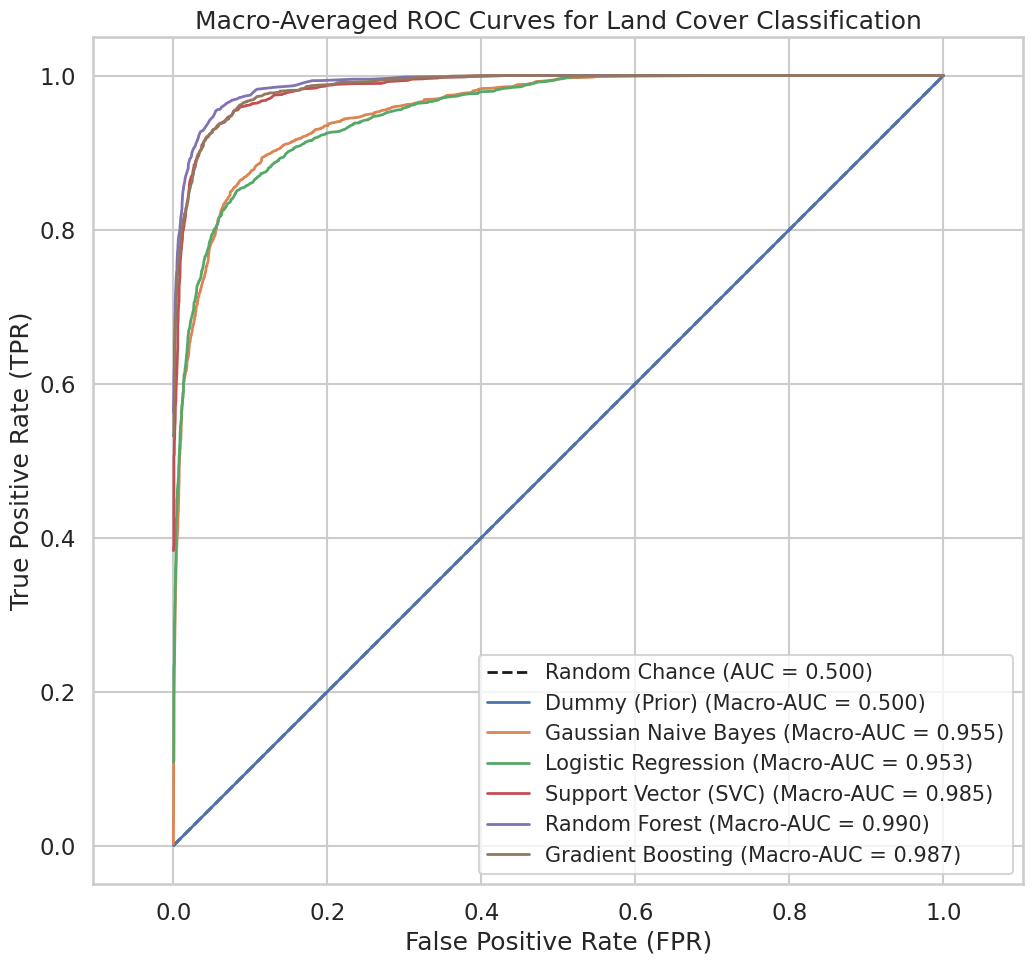

In [13]:
n_classes = 6

# Binarize the true test labels
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# Dictionary to store plotting data
roc_results = {}

print("Calculating Macro-Averaged ROC curves for all models...")

for name, model in fitted_models.items():
    # Get probability scores
    y_scores = model.predict_proba(X_test_scaled)

    # Dictionaries to store per-class curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Calculate ROC curve and AUC for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Aggregate all unique FPR values
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Average the TPRs
    mean_tpr /= n_classes

    # Compute AUC from the averaged curve
    macro_auc = auc(all_fpr, mean_tpr)

    # Store results for plotting
    roc_results[name] = (all_fpr, mean_tpr, macro_auc)
    print(f"  {name}: Macro-AUC = {macro_auc:.4f}")

print("Calculations complete.")

plt.figure(figsize=(12, 11))
sns.set(style='whitegrid', context='talk')

# Plot the 'random chance' line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Chance (AUC = 0.500)')

# Plot each model's macro-averaged ROC curve
for name, (fpr, tpr, macro_auc) in roc_results.items():
    plt.plot(
        fpr, tpr, lw=2,
        label=f'{name} (Macro-AUC = {macro_auc:.3f})'
    )

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Macro-Averaged ROC Curves for Land Cover Classification')
plt.legend(loc='lower right', fontsize='small')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.axis('equal') # Make the plot square
plt.show()

### 3. ROC Interpretation

Based on the plot and the calculated scores, the model with the highest Macro-averaged AUC is the Random Forest (Macro-AUC ≈ 0.990).

The Gradient Boosting model is a very close second (Macro-AUC ≈ 0.987), followed by SVC (Macro-AUC ≈ 0.985). All three of these models show near-perfect performance, with their curves "pulled" tightly to the top-left corner, indicating they achieve a high True Positive Rate for all classes while maintaining a very low False Positive Rate.

Model with AUC < 0.5

None of the trained models exhibited a Macro-averaged AUC<0.5.

The model with the lowest performance is the Dummy (Prior) classifier, which performed at Macro-AUC = 0.500. This is the exact definition of a "random chance" or "no-skill" classifier, which is what we expect from this model. Its curve perfectly follows the diagonal dotted line.

## PART C:
### 1. PRC Calculation [3]
Here's a concise explanation of why PRC is suitable:

The Precision-Recall Curve (PRC) is suitable for imbalanced datasets because it focuses on the performance of the minority (positive) class, which is typically the class of interest.

It does this by plotting Precision against Recall. Crucially, neither of these metrics uses True Negatives (TNs).

In an imbalanced problem, the vast majority negative class creates a massive number of TNs. The ROC curve  gets skewed by this, making its False Positive Rate look deceptively low.

The PRC avoids this trap. It directly answers the most important question for an imbalanced problem: "How many False Positives (FPs) must I accept in order to find more True Positives (TPs)?" This makes it a much more sensitive and honest measure of a model's performance on the rare class.
 ### 2. Plotting PRC [12]:

Calculating Macro-Averaged PRC curves for all models...
  Dummy (Prior): Macro mAP = 0.1667
  Gaussian Naive Bayes: Macro mAP = 0.8105
  Logistic Regression: Macro mAP = 0.8117
  Support Vector (SVC): Macro mAP = 0.9177
  Random Forest: Macro mAP = 0.9508
  Gradient Boosting: Macro mAP = 0.9363
Calculations complete.


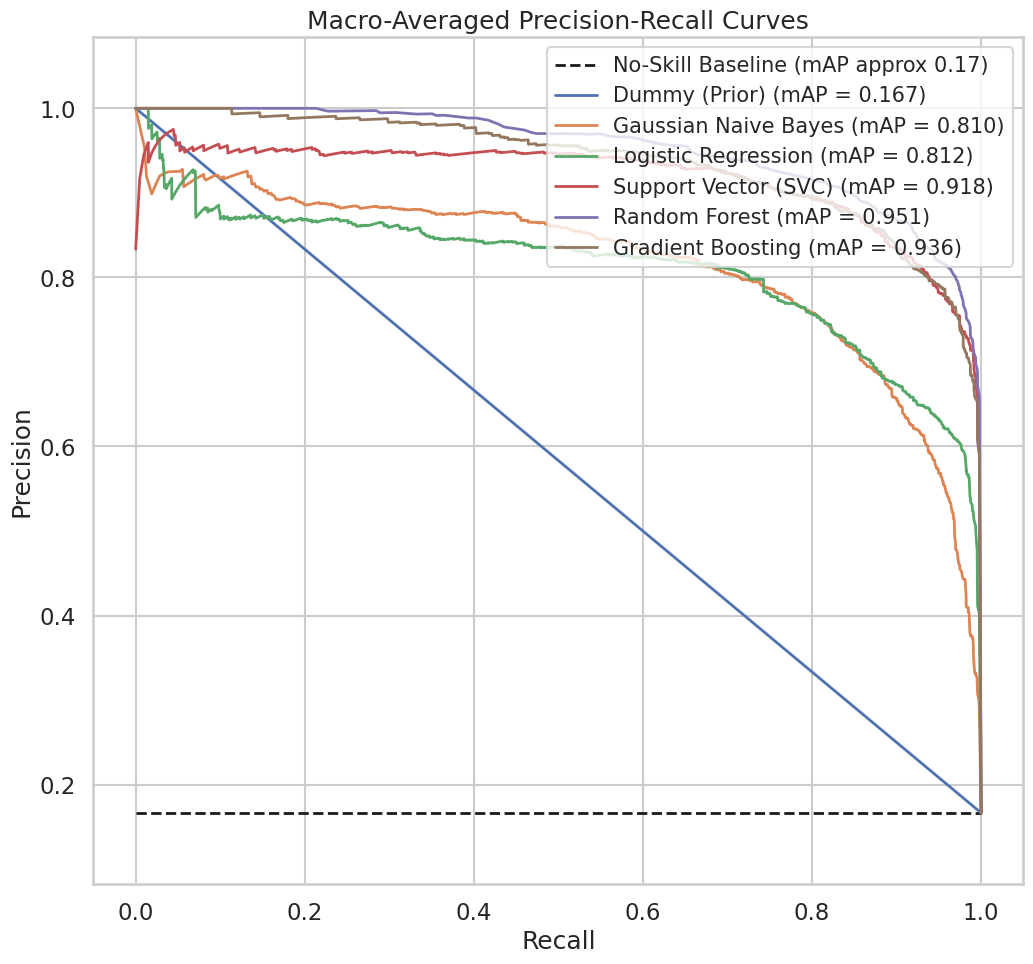

In [14]:
# Dictionary to store plotting data
prc_results = {}

print("Calculating Macro-Averaged PRC curves for all models...")

for name, model in fitted_models.items():
    # Get probability scores
    y_scores = model.predict_proba(X_test_scaled)

    # Dictionaries to store per-class curves
    precision = dict()
    recall = dict()
    ap_per_class = []

    # Calculate PRC and AP for each class
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
        ap_per_class.append(average_precision_score(y_test_bin[:, i], y_scores[:, i]))


    # Calculate mean Average Precision (mAP)
    mAP = np.mean(ap_per_class)

    # Aggregate all unique Recall values
    all_recall = np.unique(np.concatenate([recall[i] for i in range(n_classes)]))

    # Interpolate all PRC curves at these points
    mean_precision = np.zeros_like(all_recall)
    for i in range(n_classes):
        # Recall/Precision arrays are in decreasing threshold order.
        # np.interp needs increasing x-values (recall).
        mean_precision += np.interp(
            all_recall,       # New x-points
            recall[i][::-1],  # Original x-points (reversed to be increasing)
            precision[i][::-1] # Original y-points (reversed to match x)
        )

    # Average the Precisions
    mean_precision /= n_classes

    # Store results for plotting
    prc_results[name] = (all_recall, mean_precision, mAP)
    print(f"  {name}: Macro mAP = {mAP:.4f}")

print("Calculations complete.")

plt.figure(figsize=(12, 11))

# Calculate the no-skill baseline (average prevalence)
no_skill = 1 / n_classes
plt.plot([0, 1], [no_skill, no_skill], 'k--', lw=2,
         label=f'No-Skill Baseline (mAP approx {no_skill:.2f})')

# Plot each model's macro-averaged PRC curve
for name, (recall, precision, mAP) in prc_results.items():
    plt.plot(
        recall, precision, lw=2,
        label=f'{name} (mAP = {mAP:.3f})'
    )

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Macro-Averaged Precision-Recall Curves')
plt.legend(loc='upper right', fontsize='small')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.axis('equal') # Make the plot square
plt.show()

### 3. PRC Interpretation

Model with Highest Average Precision: Random Forest has the highest mean Average Precision (mAP=0.9508). This means it's the most robust model, maintaining high precision (trustworthy predictions) even as it achieves high recall (finding most true samples).

### Analysis of Worst-Performing Model's PRC:

Worst Models: The Dummy (Prior) model is the "no-skill" baseline (mAP=0.167). The worst learning models are Gaussian Naive Bayes and Logistic Regression (mAP≈0.81).

 Poor models can't separate classes well. To increase Recall, they must lower their decision threshold. As soon as they do, they include a flood of False Positives (FP). Since Precision=$\frac{TP}{TP + FP}$, the precision score plummets because the FP term grows much faster than the TP term.

## Part D:
###  Model Performance Comparison

| Model | Weighted F1-Score | Macro ROC-AUC | Macro mAP |
| :--- | :---: | :---: | :---: |
| **Random Forest** | **0.9089** | **0.9900** | **0.9508** |
| Support Vector (SVC) | 0.8925 | 0.9852 | 0.9177 |
| Gradient Boosting | 0.8905 | 0.9868 | 0.9363 |
| Gaussian Naive Bayes | 0.8036 | 0.9553 | 0.8105 |
| Logistic Regression | 0.7894 | 0.9535 | 0.8117 |
| Dummy (Prior) | 0.0864 | 0.5000 | 0.1667 |

### 1. Synthesis: Model Ranking Comparison

Yes, the model rankings are highly aligned across all three metrics (F1-Score, ROC-AUC, and mAP).

Winner is Clear: Random Forest is the #1 ranked model in all three evaluations.

Trade-offs: In this specific dataset, there is no significant trade-off (like high ROC but low PRC). The moderate class balance results in all metrics telling a similar story.

### 2. Recommendation

The recommended model is the Random Forest.

Justification: It consistently outperformed all other models across every metric. It achieved the highest F1-Score (0.9089), the highest ROC-AUC (0.9900), and the highest mAP (0.9508). This demonstrates it is the most robust and reliable choice, offering the best balance of finding true positives (Recall) while maintaining high trustworthiness (Precision).